# เทคนิค web scraping
- python กับตัวอย่างในการดึงราคาหุ้นไทย

In [17]:
url = 'https://www.set.or.th/th/market/product/stock/quote/KCE/price'

#กรณีที่เราหาไม่เจอเราควรหา url อื่นๆ มาลองใหม่
url = 'https://www.set.or.th/api/set/stock/KCE/historical-trading'

In [68]:
import pandas as pd
import mplcyberpunk
import matplotlib.pyplot as plt
plt.style.use("cyberpunk")
%config InlineBackend.figure_format='retina'

import requests
page = requests.get(url)

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [11]:
#soup.find_all('div',{'id':'price-historical-stock'})

In [65]:
df = pd.read_json(soup.text)
df

date symbol  prior   open   high    low  average  \
0   2022-04-29 00:00:00+07:00    KCE  62.00  62.00  62.25  61.50    61.83   
1   2022-04-28 00:00:00+07:00    KCE  60.75  61.25  62.50  60.50    61.59   
2   2022-04-27 00:00:00+07:00    KCE  62.00  61.25  61.50  60.25    60.82   
3   2022-04-26 00:00:00+07:00    KCE  62.50  63.50  63.75  62.00    62.69   
4   2022-04-25 00:00:00+07:00    KCE  63.25  62.00  62.75  62.00    62.36   
..                        ...    ...    ...    ...    ...    ...      ...   
116 2021-11-05 00:00:00+07:00    KCE  89.25  89.50  90.00  87.75    88.78   
117 2021-11-04 00:00:00+07:00    KCE  88.00  88.75  89.50  88.50    88.96   
118 2021-11-03 00:00:00+07:00    KCE  89.00  89.25  90.50  87.00    88.56   
119 2021-11-02 00:00:00+07:00    KCE  88.25  88.75  92.25  88.25    89.93   
120 2021-11-01 00:00:00+07:00    KCE  87.00  87.50  90.00  87.50    88.75   

     close  change  percentChange  ...   pbv  bookValuePerShare  \
0    61.50   -0.50          -0.81  ...  5.43              11.32   
1    62.00    1.25           2.06  ...  5.48              11.32   
2    60.75   -1.25          -2.02  ...  5.37              11.32   
3    62.00   -0.50          -0.80  ...  5.48              11.32   
4    62.50   -0.75          -1.19  ...  5.52              11.32   
..     ...     ...            ...  ...   ...                ...   
116  89.00   -0.25          -0.28  ...  8.24              10.80   
117  89.25    1.25           1.42  ...  8.27              10.80   
118  88.00   -1.00          -1.12  ...  8.15              10.80   
119  89.00    0.75           0.85  ...  8.24              10.80   
120  88.25    1.25           1.44  ...  8.17              10.80   

     dividendYield     marketCap  listedShare  par              financialDate  \
0             2.60  7.267948e+10   1181780096  0.5  2021-12-31T00:00:00+07:00   
1             2.58  7.327037e+10   1181780096  0.5  2021-12-31T00:00:00+07:00   
2             2.63  7.179314e+10   1181780096  0.5  2021-12-31T00:00:00+07:00   
3             2.58  7.327037e+10   1181780096  0.5  2021-12-31T00:00:00+07:00   
4             2.56  7.386126e+10   1181780096  0.5  2021-12-31T00:00:00+07:00   
..             ...           ...          ...  ...                        ...   
116           0.90  1.051468e+11   1181424296  0.5  2021-06-30T00:00:00+07:00   
117           0.89  1.054421e+11   1181424296  0.5  2021-06-30T00:00:00+07:00   
118           0.91  1.039653e+11   1181424296  0.5  2021-06-30T00:00:00+07:00   
119           0.90  1.051468e+11   1181424296  0.5  2021-06-30T00:00:00+07:00   
120           0.90  1.042607e+11   1181424296  0.5  2021-06-30T00:00:00+07:00   

     nav  marketIndex marketPercentChange  
0    NaN      1667.44           -0.017988  
1    NaN      1667.74            0.352009  
2    NaN      1661.89           -0.424214  
3    NaN      1668.97           -0.379627  
4    NaN      1675.33           -0.902643  
..   ...          ...                 ...  
116  NaN      1626.22           -0.003075  
117  NaN      1626.27            0.890243  
118  NaN      1611.92           -0.368999  
119  NaN      1617.89            0.254682  
120  NaN      1613.78           -0.594420  

[121 rows x 23 columns]

In [66]:
df = df.set_index('date')
df = df.sort_index(ascending=True)

<AxesSubplot:title={'center':'KCE-HIST Price'}, xlabel='date'>

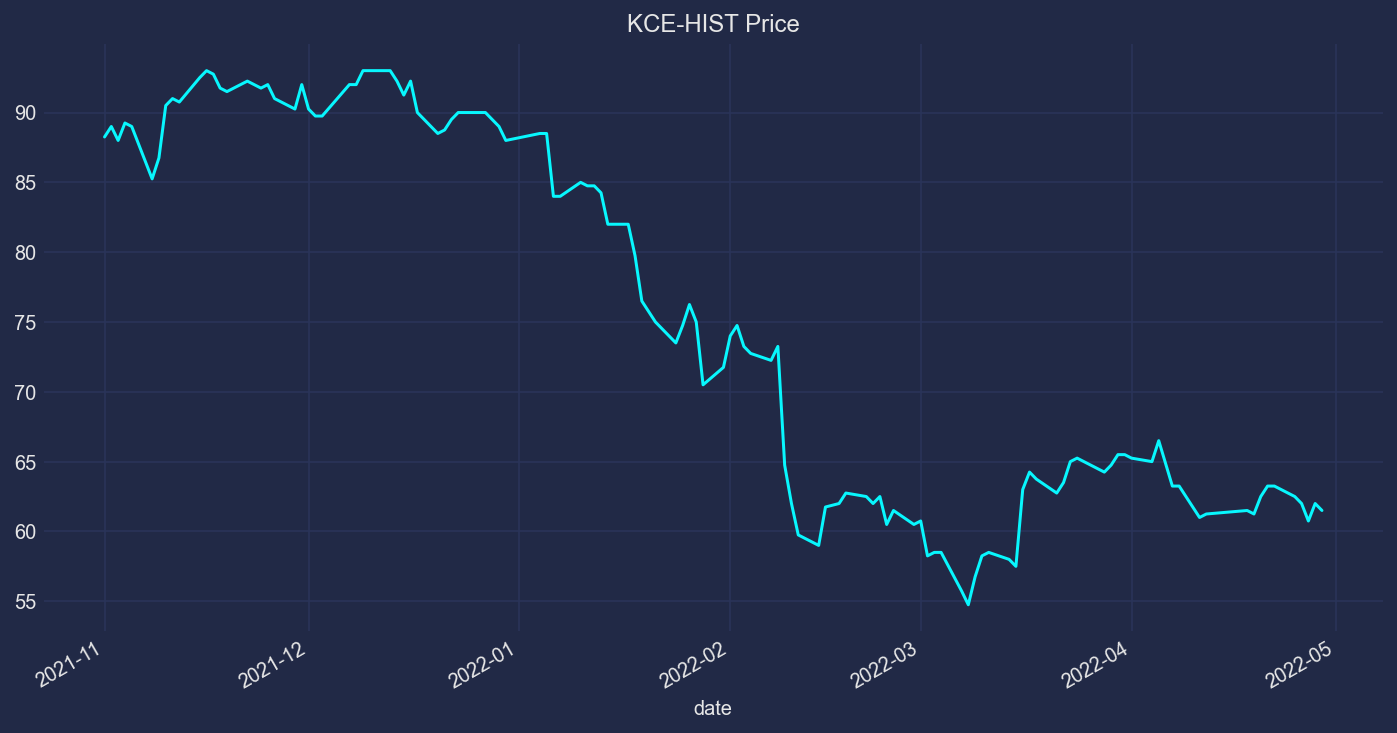

In [71]:
df['close'].plot(title='KCE-HIST Price',figsize=(12,6))